In [674]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [675]:
# Constants
api_key = "ZOC333QF0ZHXU5YD"
series = "TIME_SERIES_DAILY"
request_url = "https://www.alphavantage.co/query"
d_address = 'Data/Deaths.csv'
c_address = 'Data/Confirmed.csv'

In [676]:
def fetch_stock_values(symbol):
    query_params = {
        'function' : series,
        'symbol' : symbol,
        'apikey': api_key
    }
    headers = {
        'User-Agent': 'XY',
        'Content-type': 'application/json'
    }
    response = requests.get(request_url, headers=headers, params=query_params)
    return response.text if response.status_code == 200 else "Something went wrong"

In [677]:
# SPDR S&P 500 ETF Trust
spy_json = json.loads(fetch_stock_values(symbol='spy'))
sdf = pd.DataFrame(spy_json['Time Series (Daily)']).astype(float)
spy_df = sdf.drop(['1. open','4. close','5. volume'],axis=0)
spy = spy_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [678]:
# Zoom Video Communications Inc
zm_json = json.loads(fetch_stock_values(symbol='ZM'))
zdf = pd.DataFrame(zm_json['Time Series (Daily)']).astype(float)
zm_df = zdf.drop(['1. open','4. close','5. volume'],axis=0)
zm = zm_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [679]:
# Delta Air Lines, Inc
dal_json = json.loads(fetch_stock_values(symbol='DAL'))
ddf = pd.DataFrame(dal_json['Time Series (Daily)']).astype(float)
dal_df = ddf.drop(['1. open','4. close','5. volume'],axis=0)
dal = dal_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [680]:
# Annaly Capital Management, Inc
nly_json = json.loads(fetch_stock_values(symbol='NLY'))
ndf = pd.DataFrame(nly_json['Time Series (Daily)']).astype(float)
nly_df = ndf.drop(['1. open','4. close','5. volume'],axis=0)
nly = nly_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [681]:
# GOLD
gld_json = json.loads(fetch_stock_values(symbol='GOLD'))
gdf = pd.DataFrame(gld_json['Time Series (Daily)']).astype(float)
gld_df = gdf.drop(['1. open','4. close','5. volume'],axis=0)
gld = gld_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [682]:
spy_tp_df = spy.T
zm_tp_df = zm.T
dal_tp_df = dal.T
nly_tp_df = nly.T
gld_tp_df = gld.T

In [694]:
# spy_tp_df.index.name = 'Date'
spy_tp_df.rename_axis('Date', inplace=True)
spy_tp_df.head(5)

,high,low
Date,,
2022-04-25,428.6900,418.84
2022-04-22,438.0825,425.44
2022-04-21,450.0100,437.10
2022-04-20,447.5700,443.48
2022-04-19,445.8000,437.68


In [684]:
# Importing COVID Deaths data from CSV
deaths_data = pd.read_csv(d_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
deaths_data['Date'] = pd.to_datetime(deaths_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Deaths data such that value is at position 1.
deaths_data['Date'] = deaths_data['Date'].values[::-1].astype(str)
deaths_data['Deaths'] = deaths_data['Deaths'].values[::-1]

# Assigning Date as default index
deaths_data.set_index('Date', inplace=True)

# Number of Deaths is in multiples of 10k we will have to divide it such that the visuals can correlate each other.
deaths_data['Deaths'] = deaths_data['Deaths'].div(100)

# Printing Dataframe
deaths_data

,Deaths
Date,
2022-04-25,388.85
2022-04-24,388.78
2022-04-23,388.53
2022-04-22,388.01
2022-04-21,386.96
...,...
2021-12-05,298.96
2021-12-04,298.89
2021-12-03,298.80


In [684]:
# SPDR S&P 500 ETF Trust
spy_json = json.loads(fetch_stock_values(symbol='spy'))
sdf = pd.DataFrame(spy_json['Time Series (Daily)']).astype(float)
spy_df = sdf.drop(['1. open','4. close','5. volume'],axis=0)
spy = spy_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [5]:
# Zoom Video Communications Inc
zm_json = json.loads(fetch_stock_values(symbol='ZM'))
zdf = pd.DataFrame(zm_json['Time Series (Daily)']).astype(float)
zm_df = zdf.drop(['1. open','4. close','5. volume'],axis=0)
zm = zm_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [6]:
# Delta Air Lines, Inc
dal_json = json.loads(fetch_stock_values(symbol='DAL'))
ddf = pd.DataFrame(dal_json['Time Series (Daily)']).astype(float)
dal_df = ddf.drop(['1. open','4. close','5. volume'],axis=0)
dal = dal_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [7]:
# Annaly Capital Management, Inc
nly_json = json.loads(fetch_stock_values(symbol='NLY'))
ndf = pd.DataFrame(nly_json['Time Series (Daily)']).astype(float)
nly_df = ndf.drop(['1. open','4. close','5. volume'],axis=0)
nly = nly_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [8]:
# GOLD
gld_json = json.loads(fetch_stock_values(symbol='GOLD'))
gdf = pd.DataFrame(gld_json['Time Series (Daily)']).astype(float)
gld_df = gdf.drop(['1. open','4. close','5. volume'],axis=0)
gld = gld_df.rename({'2. high' : 'high', '3. low' : 'low'})

In [9]:
spy_tp_df = spy.T
zm_tp_df = zm.T
dal_tp_df = dal.T
nly_tp_df = nly.T
gld_tp_df = gld.T

In [16]:
spy_tp_df

,high,low
2022-04-22,438.0825,425.44
2022-04-21,450.0100,437.10
2022-04-20,447.5700,443.48
2022-04-19,445.8000,437.68
2022-04-18,439.7500,435.61
...,...,...
2021-12-06,460.7900,453.56
2021-12-03,460.3000,448.92
2021-12-02,459.0700,450.31
2021-12-01,464.6700,450.29


In [10]:
# COVID Confirmed
confirmed = pd.read_csv(c_address)
confirmed_df = confirmed.dropna(axis=0,how='all')

# COVID Deaths
deaths = pd.read_csv(d_address)
death_df = deaths.dropna(axis=0,how='all')

Text(0.5, 1.0, 'SPDR S&P 500 ETF Trust')

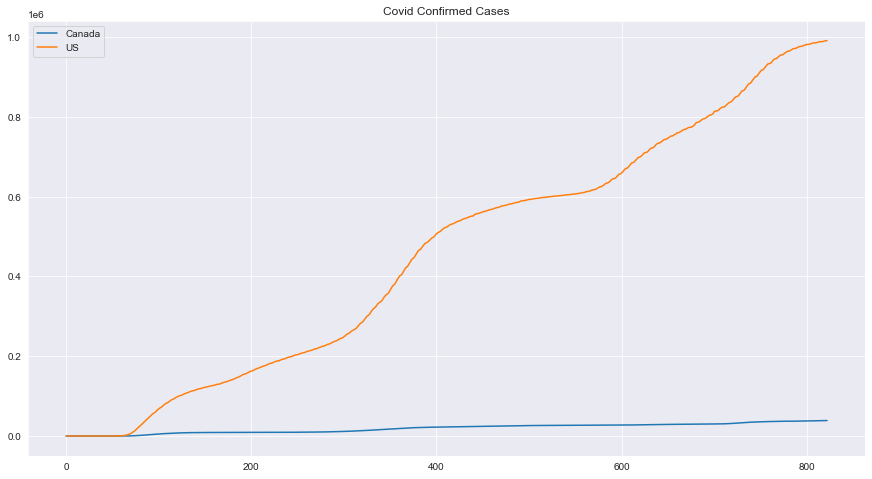

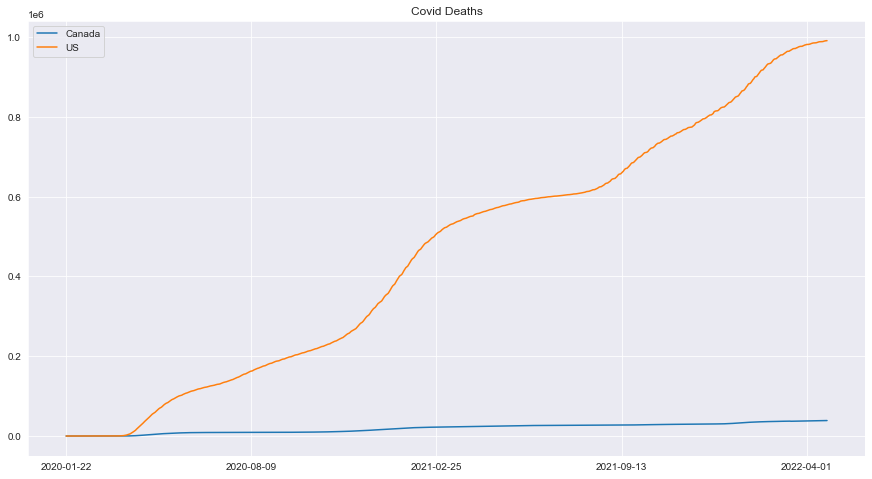

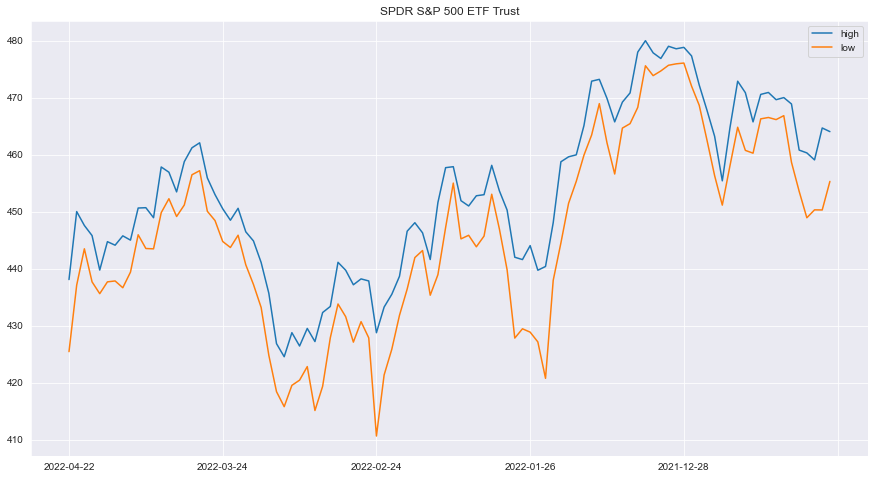

In [11]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
spy_tp_df.plot.line(figsize=(15,8))
plt.title("SPDR S&P 500 ETF Trust")

Text(0.5, 1.0, 'Zoom')

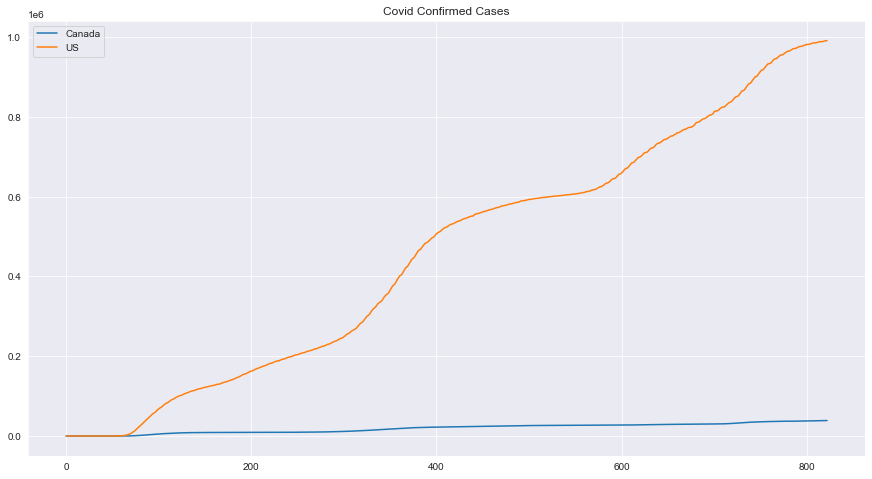

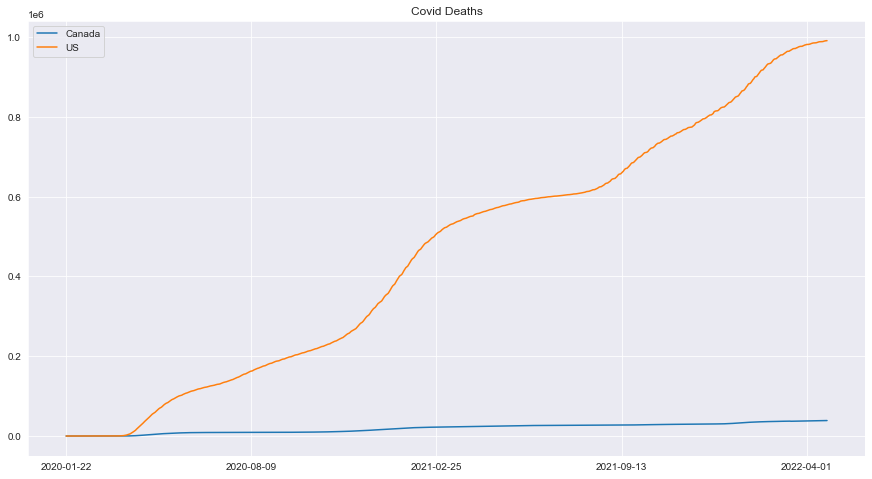

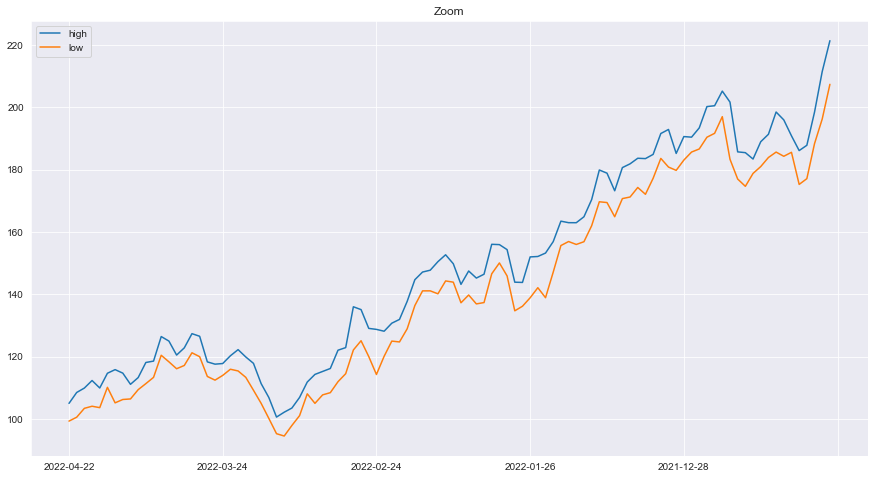

In [12]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
zm_tp_df.plot.line(figsize=(15,8))
plt.title("Zoom")

Text(0.5, 1.0, 'Delta Air Lines, Inc')

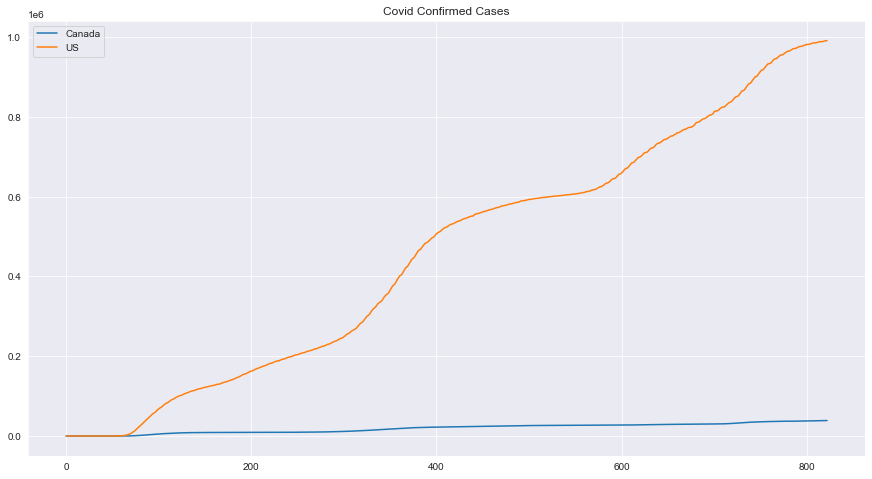

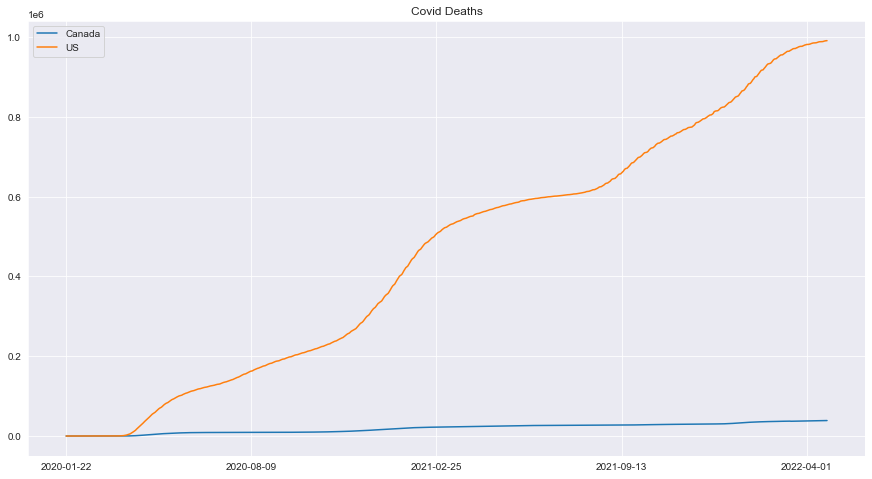

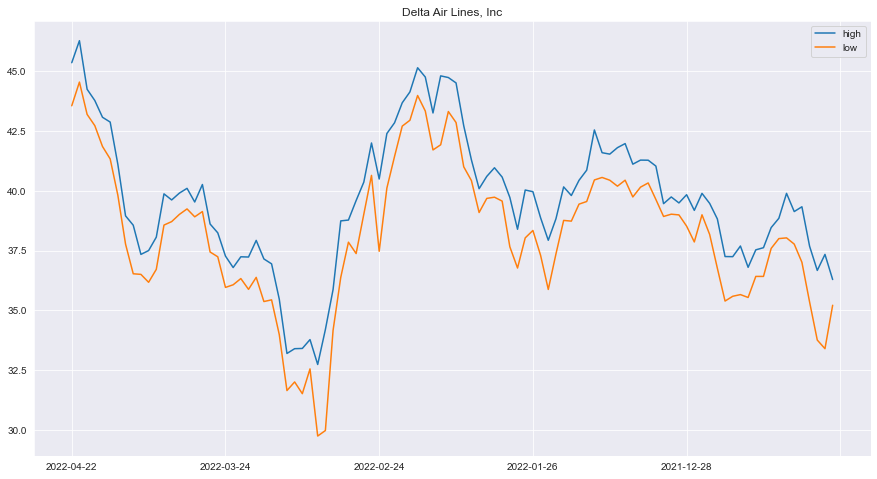

In [13]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
dal_tp_df.plot.line(figsize=(15,8))
plt.title("Delta Air Lines, Inc")

Text(0.5, 1.0, 'Annaly Capital Management, Inc')

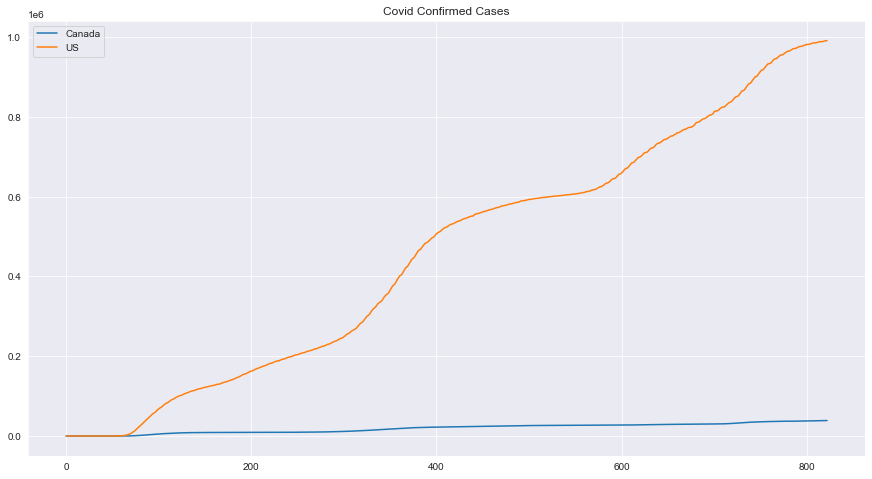

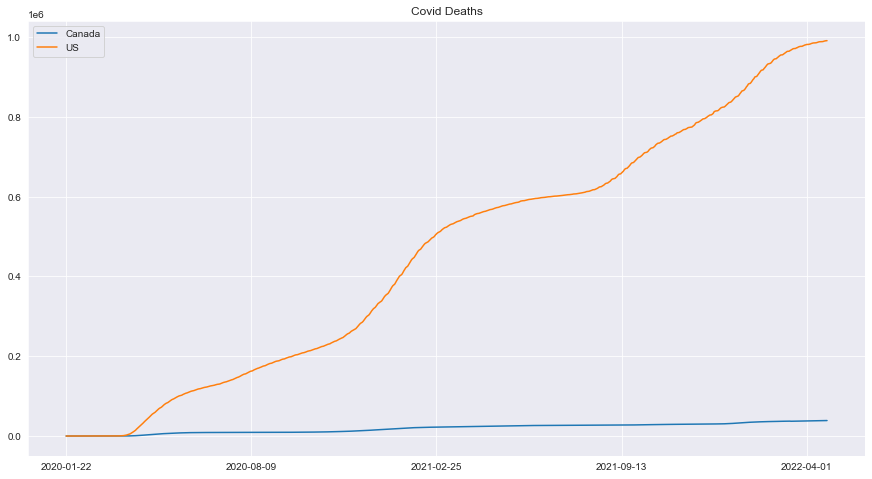

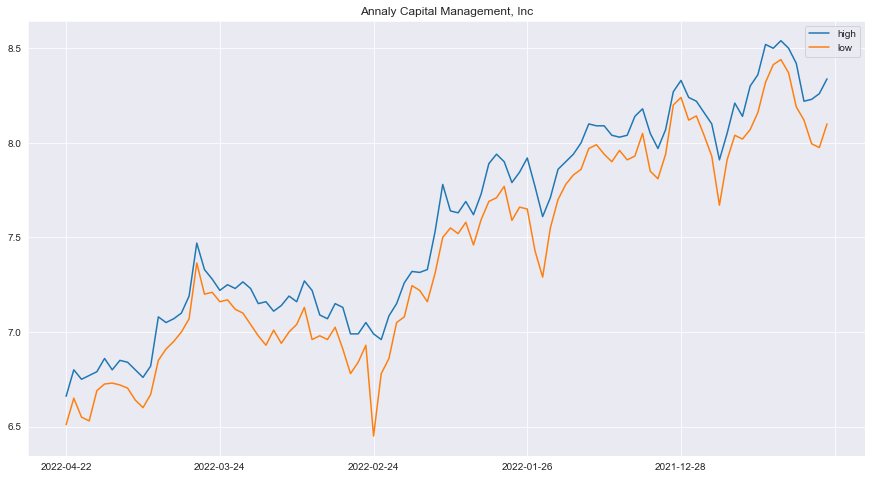

In [14]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
nly_tp_df.plot.line(figsize=(15,8))
plt.title("Annaly Capital Management, Inc")

Text(0.5, 1.0, 'GOLD')

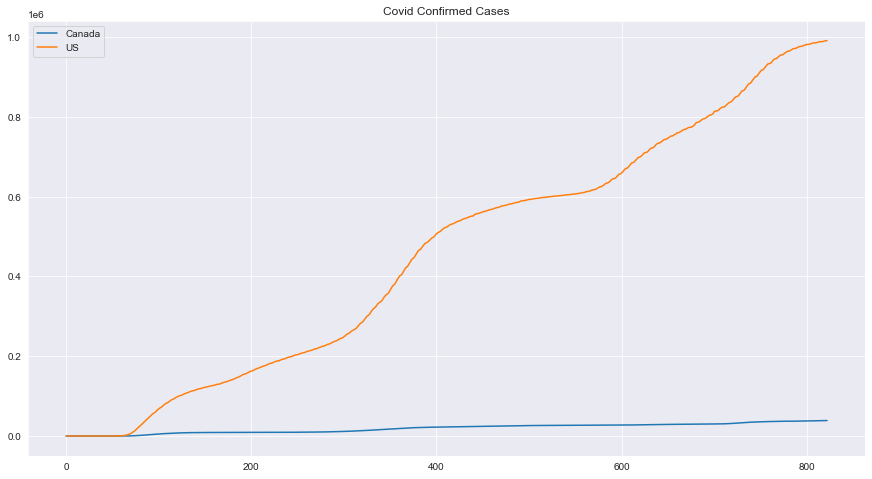

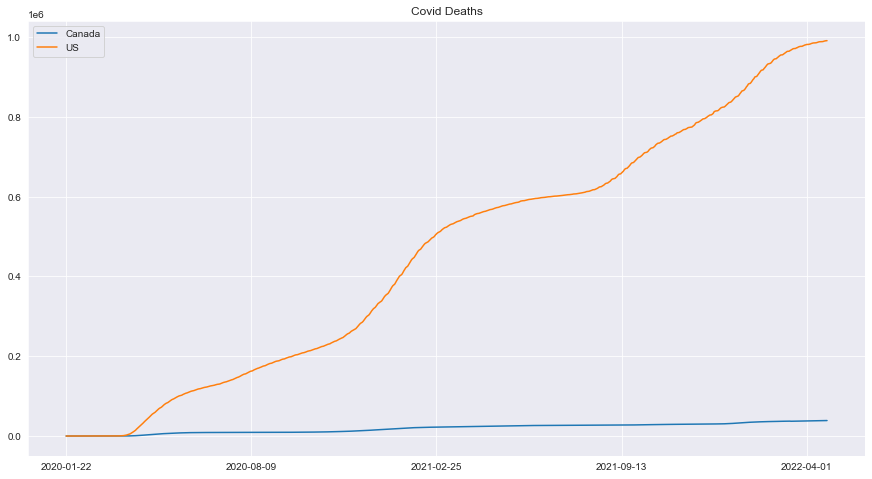

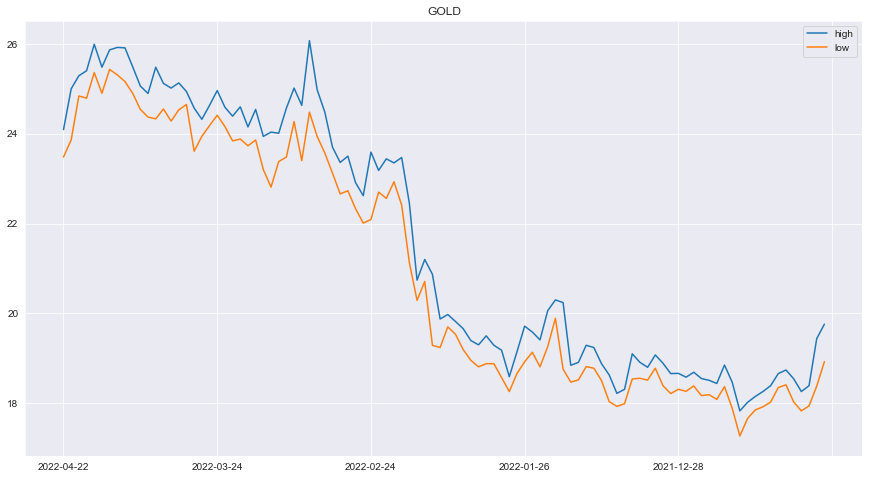

In [15]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
gld_tp_df.plot.line(figsize=(15,8))
plt.title("GOLD")

In [685]:
# COVID Confirmed
confirmed = pd.read_csv(c_address)
confirmed_df = confirmed.dropna(axis=0,how='all')

# COVID Deaths
deaths = pd.read_csv(d_address)
death_df = deaths.dropna(axis=0,how='all')

In [686]:
d_new = spy_tp_df.join(deaths_data, how='outer')

In [687]:
d_new

,high,low,Deaths
Date,,,
2021-12-01,464.6700,450.29,298.37
2021-12-02,459.0700,450.31,298.58
2021-12-03,460.3000,448.92,298.80
2021-12-04,NaN,NaN,298.89
2021-12-05,NaN,NaN,298.96
...,...,...,...
2022-04-21,450.0100,437.10,386.96
2022-04-22,438.0825,425.44,388.01
2022-04-23,NaN,NaN,388.53


In [688]:
# d_new['Timestamp'] = d_new.index
# d_new

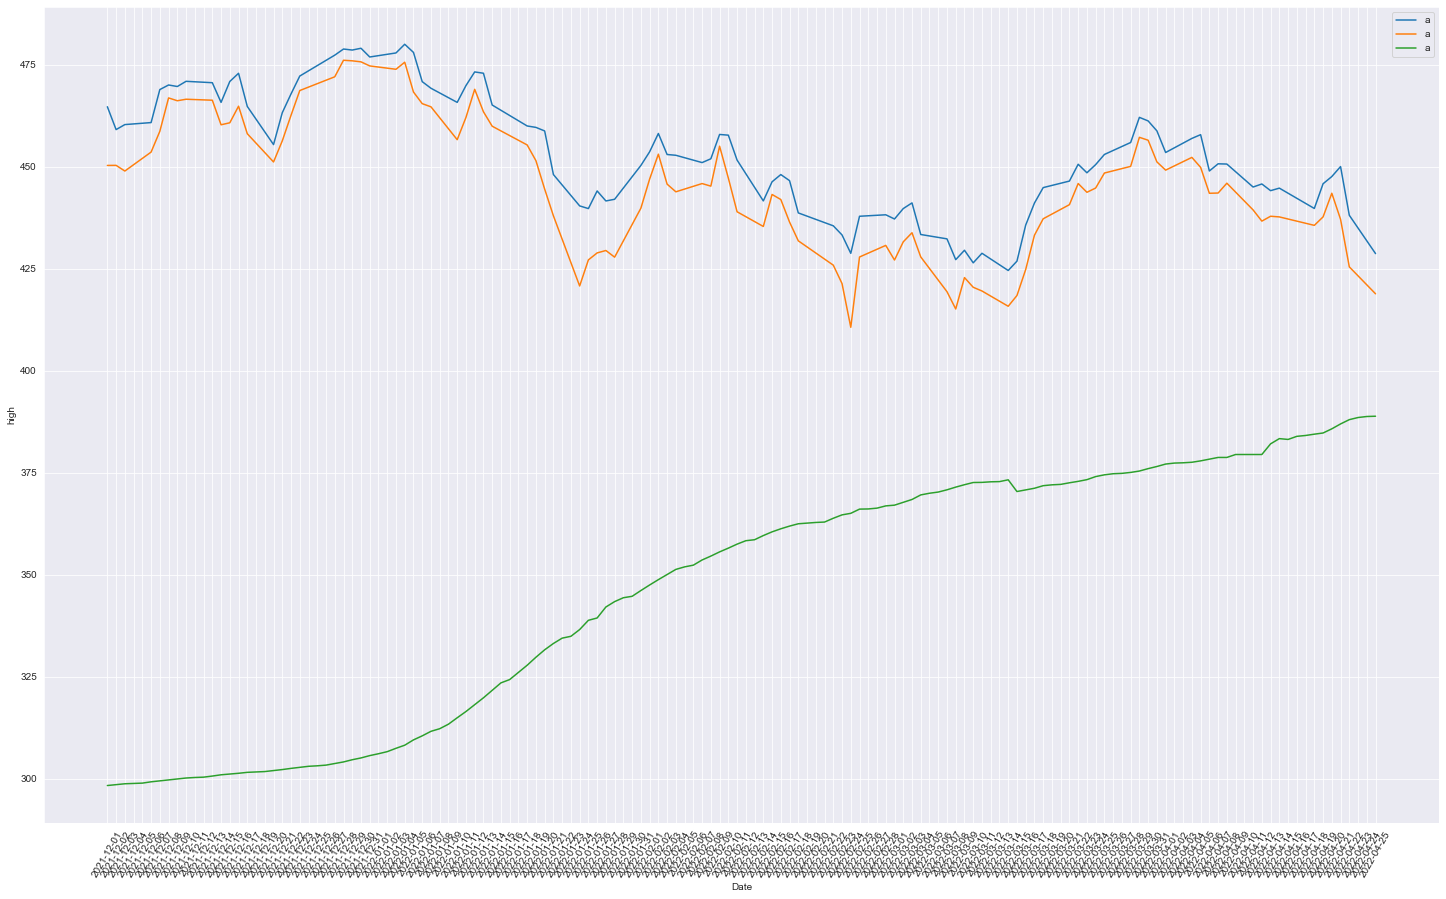

In [689]:
fig, ax = plt.subplots(figsize=(25, 15))
# plt.xticks(ticks=)
sns.lineplot(data=d_new, x=d_new.index.astype(str), y=d_new['high'], label='a', ax=ax)
sns.lineplot(data=d_new, x=d_new.index.astype(str), y=d_new['low'], label='a', ax=ax)
sns.lineplot(data=d_new, x=d_new.index.astype(str), y=d_new['Deaths'], label='a', ax=ax)
ax.tick_params(axis='x', rotation=60)

Text(0.5, 1.0, 'Zoom')

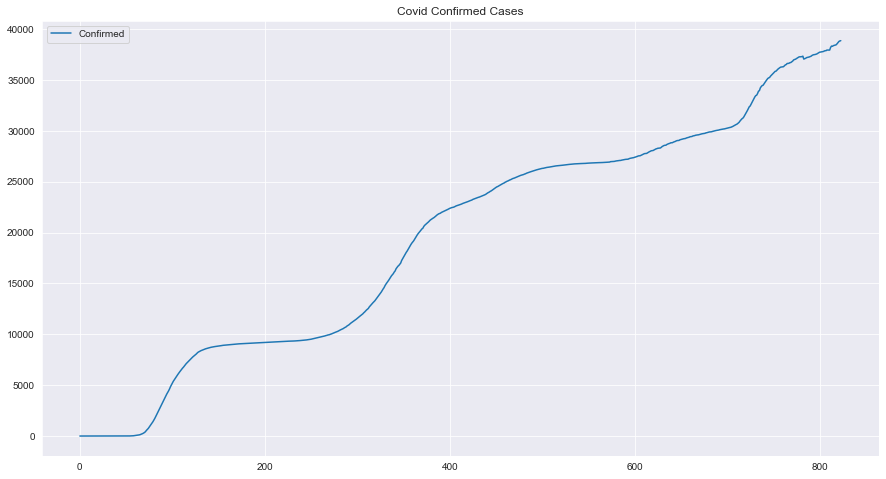

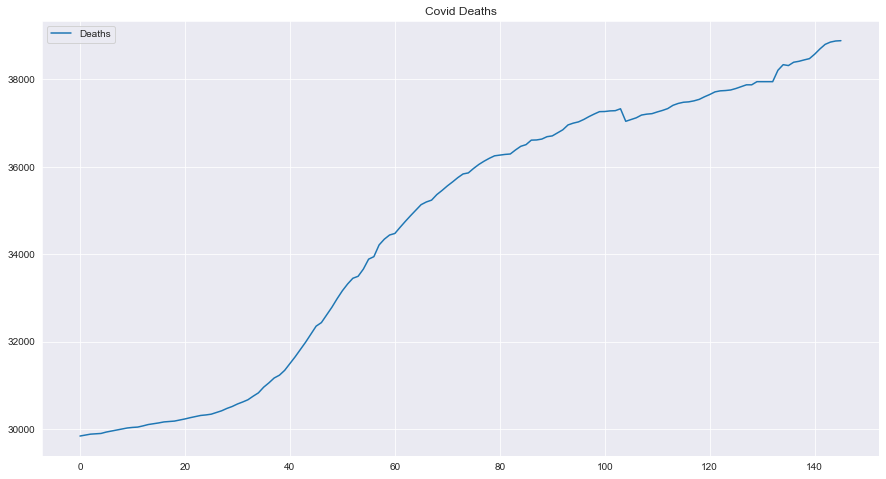

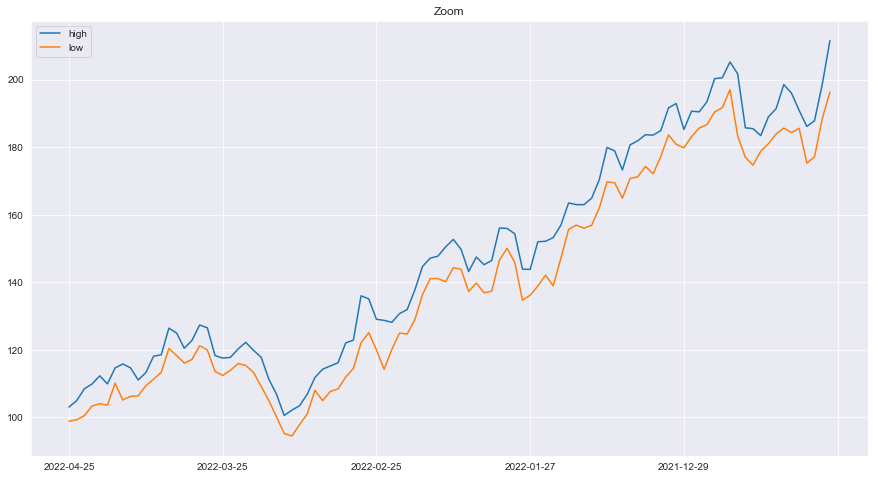

In [690]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
zm_tp_df.plot.line(figsize=(15,8))
plt.title("Zoom")

Text(0.5, 1.0, 'Delta Air Lines, Inc')

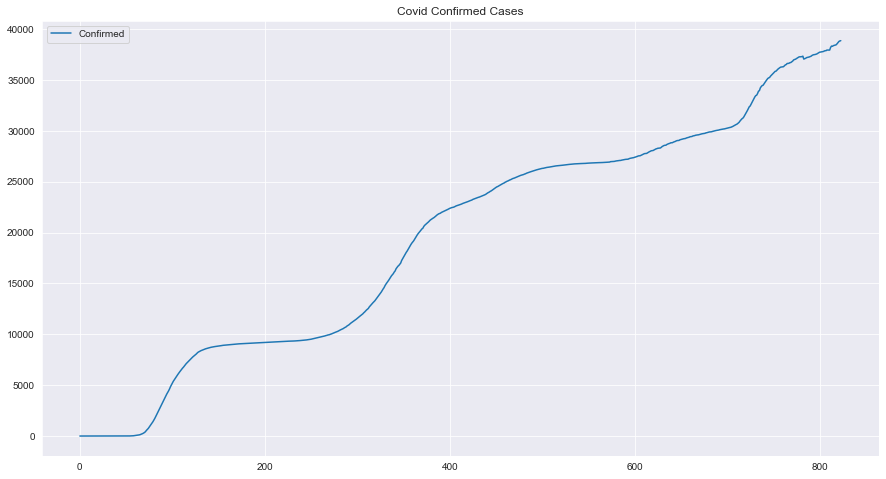

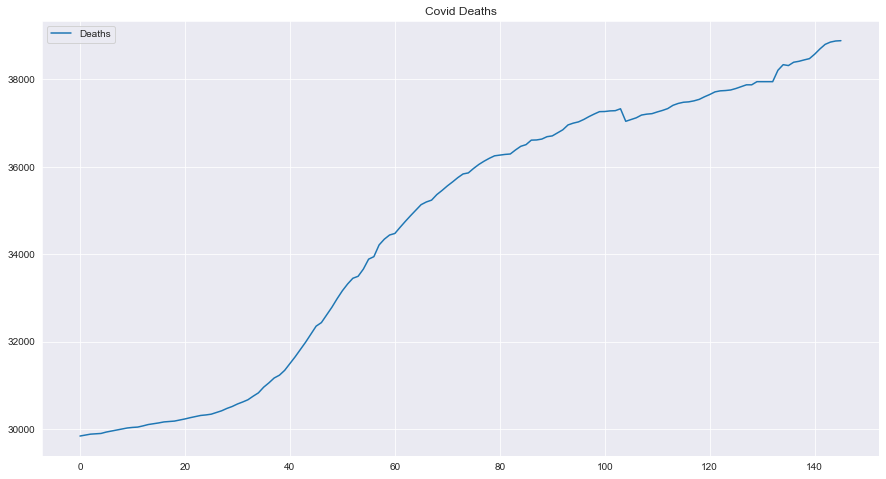

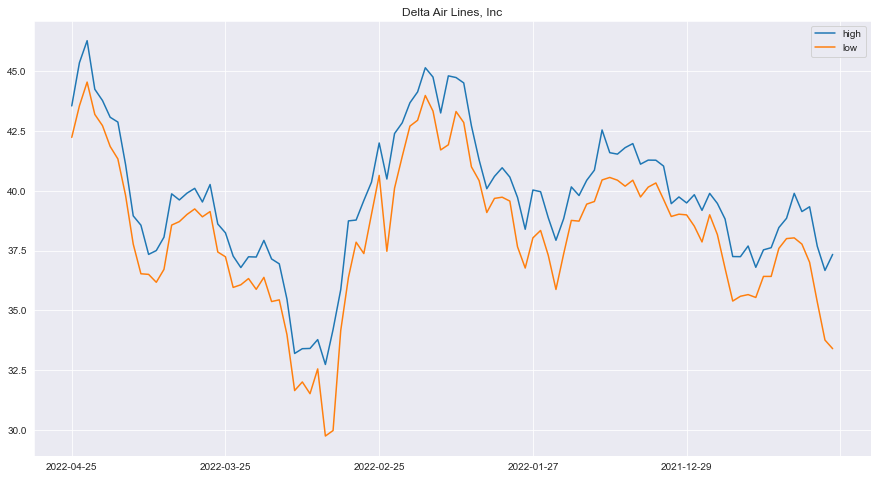

In [691]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
dal_tp_df.plot.line(figsize=(15,8))
plt.title("Delta Air Lines, Inc")

Text(0.5, 1.0, 'Annaly Capital Management, Inc')

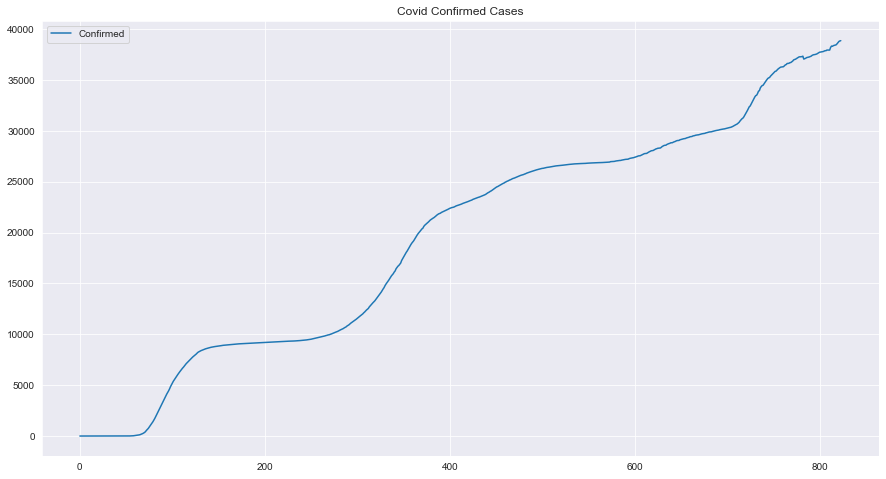

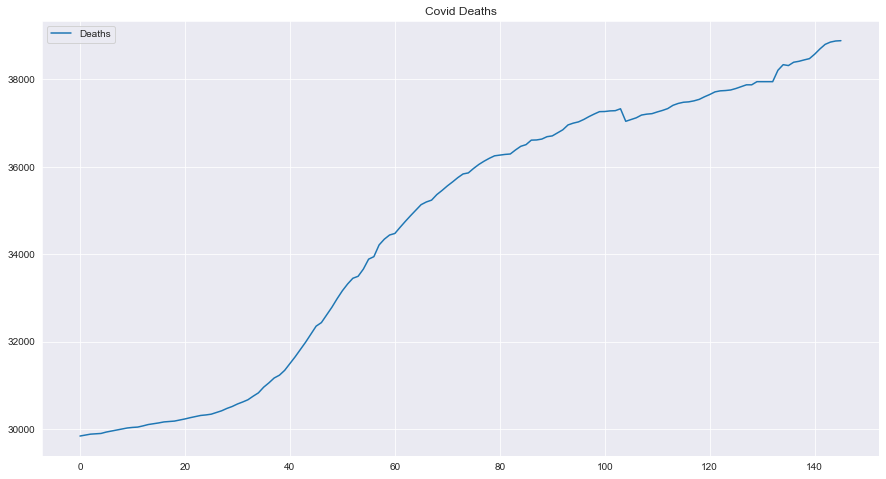

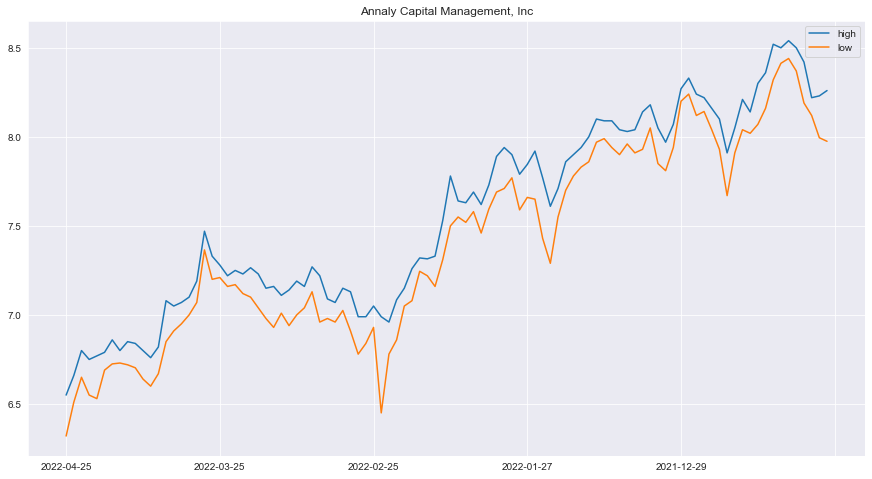

In [692]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
nly_tp_df.plot.line(figsize=(15,8))
plt.title("Annaly Capital Management, Inc")

Text(0.5, 1.0, 'GOLD')

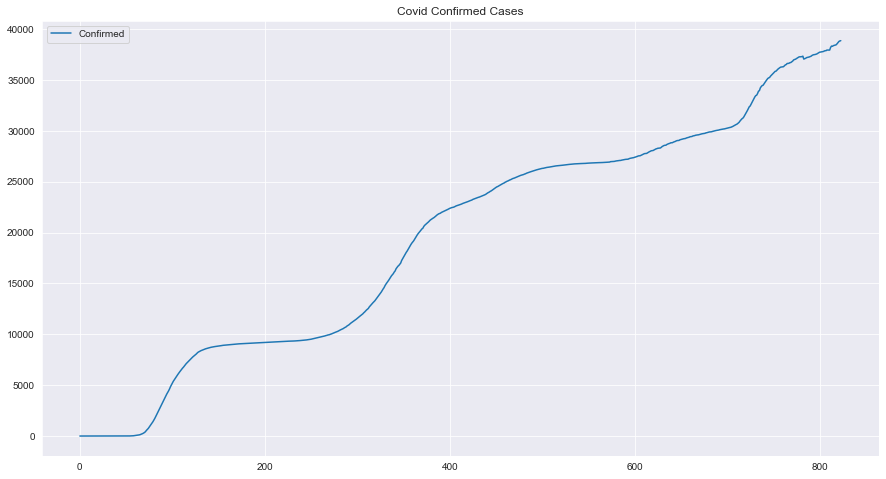

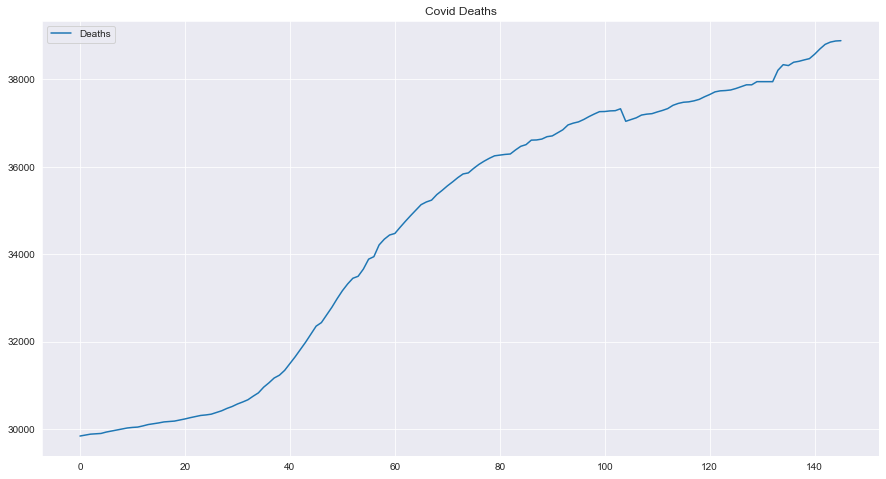

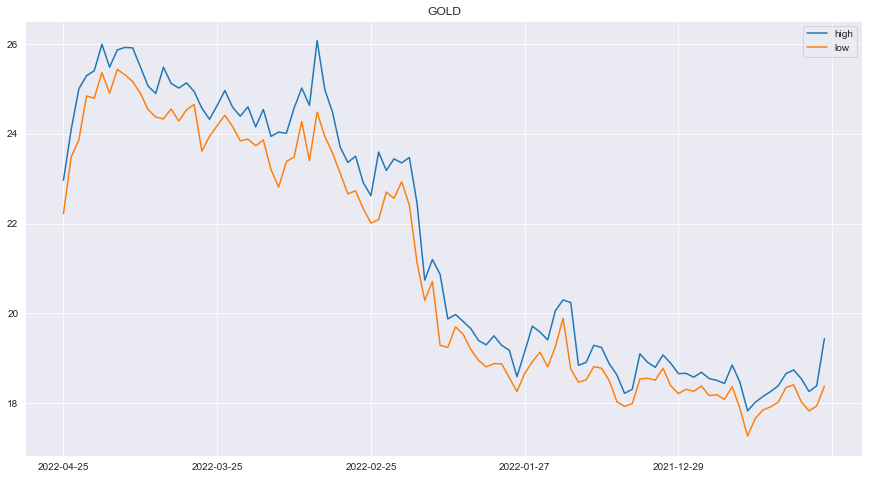

In [693]:
# Plotting Confirmed Cases
confirmed_df.plot.line(figsize=(15,8))
plt.title("Covid Confirmed Cases")

# Plotting Deaths
death_df.plot.line(figsize=(15,8))
plt.title("Covid Deaths")

# Plotting High-Low value
gld_tp_df.plot.line(figsize=(15,8))
plt.title("GOLD")